# Telecom-Customer-Churn

**• DOMAIN:** Telecom

**• CONTEXT:** A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs.

**• DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn
    
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
• Demographic info about customers – gender, age range, and if they have partners and dependents
    
**• PROJECT OBJECTIVE:** The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.


### STEPS AND TASK [60 Marks]:

### 1. Data Understanding & Exploration: [5 Marks]

In [74]:
# Import Libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
# Read dataset 1
df = pd.read_csv("TelcomCustomer-Churn_1.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


##### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
# Read Dataset 2
df1 = pd.read_csv("TelcomCustomer-Churn_2.csv")
df1.head(5)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [4]:
print(len(df))
print(len(df1))

7043
7043


In [5]:
# Merge datasets
df_f = pd.merge(df,df1,how="inner",on="customerID")

In [6]:
print(len(df_f))

7043


In [7]:
df_f.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [8]:
df_col = list(df.columns)
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')


In [9]:
df1.drop(["customerID"],axis=1,inplace=True)
df1_col = list(df1.columns)
print(df1.columns)

Index(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [10]:
final_columns = df_col + df1_col

In [11]:
actual_columns = list(df_f.columns)

In [12]:
if final_columns == actual_columns:
    print("All columns are Matching")
else:
    print("Columns are not matching")

All columns are Matching


### 2. Data Cleaning & Analysis: [15 Marks]

##### A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [13]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# replacing spaces with nan values
df_f = df_f.replace(' ',np.nan)
df_f.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
col_names = list(df_f.columns)
for i in col_names:
    print(i)
    print(df_f[i].value_counts())

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes   

In [16]:
df_f.dropna(inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [17]:
df_f.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
##### [For Example: MonthlyCharges, TotalCharges]

In [18]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [19]:
# coverting columns to categorical datatype
col_names = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
             'PaymentMethod','Churn']
for i in col_names:
    df_f[i] = pd.Categorical(df_f[i])

In [20]:
# coverting columns to float type
df_f["TotalCharges"] = df_f["TotalCharges"].astype("float")

In [21]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

##### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

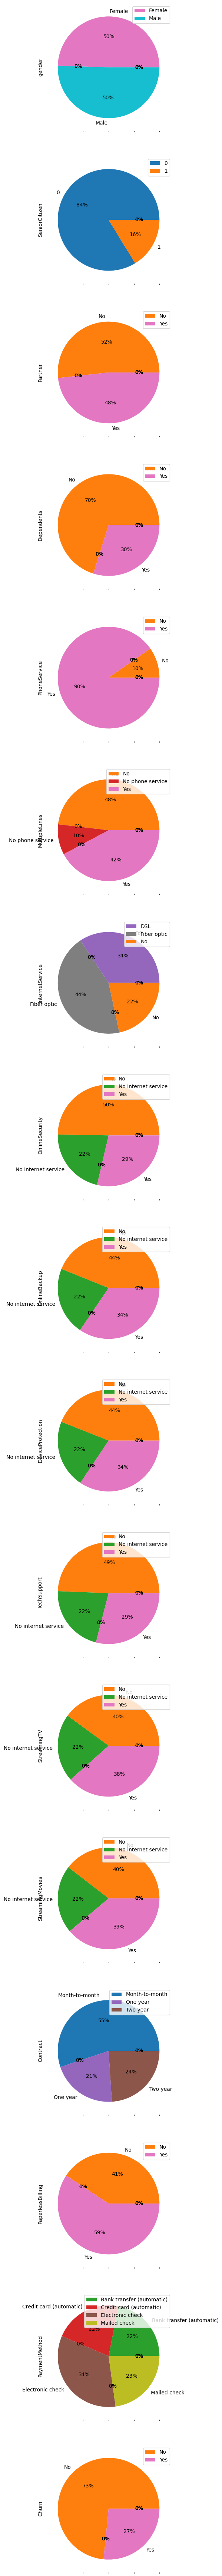

In [22]:
# Plotting piechart
def plot_piechart(df):
    pie_data=df.select_dtypes(include=['category'])
    pie_data=pie_data.apply(pd.value_counts)
    pie_data.plot(kind='pie', subplots=True, autopct='%1.0f%%', layout=(len(pie_data.columns),1), figsize=(90,90))

plot_piechart(df_f)

##### D. Share insights for Q2.c. [2 Marks]

1. Data is equally distributed accross both the genders.
2. There are just 16% senior citizens in the dataset.
3. Partners data is also almost equally distributed. Those who don't have partners have slightly high numbers.
4. Around 70% of the data(people) don't have dependents.
5. Around 90% of the people have phone service than the people who don't have phone service.
6. 48% of the people don't have multiple lines out of who all are using phones.
7. For Internet service, 44% people have fiber optic and 34% have DSL.
8. Half of the people don't have online security.
9. Only 34% people uses online backup system.
10. Device protection is used by 44% people.
11. Only 29% people have tech support.
12. Number of People who are streamingTV and who are not streamingTV are almost same.
13. Almost same number of people stream movies with respect to who don't stream movies.
14. Around 55 % of the people choose month to month contract.
15. Around 59% people prefers paperless billing.
16. Number of people who are using mailed check, bank transfer and credit card is almost same. but more prople are preferring eletronic check.
17. Most of the people (73%) don't have churn.

##### E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [23]:
df_f.drop(["customerID"],axis=1,inplace=True)

In [24]:
# Splitting dataset into 2 different datasets.
X = df_f.drop(["Churn"],axis=1)
y = df_f[["Churn"]]

In [25]:
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [26]:
y.head(5)

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [27]:
# Encoding column values
le = preprocessing.LabelEncoder()
colns = ["gender","Partner","Dependents","PhoneService","MultipleLines",
         "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
         "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod"]
for i in colns:
    X[i]= le.fit_transform(X[i].values)

In [28]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

##### F. Split the data into 80% train and 20% test. [1 Marks]

In [29]:
# Splitting data sets into train and test data
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=7)
X_train.shape, X_test.shape

((5625, 20), (1407, 20))

##### G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [30]:
# Normalisation/Standardozation of the data.
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns =X_train.columns)
normalized_x_train.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen_1,Contract_One year,Contract_Two year
0,0.993091,1.040462,-0.654792,0.189925,0.326876,1.119933,-1.178458,1.404721,-1.031848,1.241566,-0.92785,1.158059,1.146934,-1.200586,1.330215,0.488581,0.282880,-0.443631,1.940863,-0.564964
1,0.993091,-0.961111,-0.654792,-0.462689,0.326876,-0.988727,-1.178458,-0.922689,-1.031848,1.241566,-0.92785,-1.105347,1.146934,-1.200586,1.330215,-0.095731,-0.388063,-0.443631,-0.515235,-0.564964
2,0.993091,1.040462,-0.654792,-1.278456,0.326876,1.119933,0.171883,-0.922689,-1.031848,-1.033290,-0.92785,-1.105347,-1.115958,0.832927,-1.473254,0.334203,-0.970972,-0.443631,-0.515235,-0.564964
3,0.993091,-0.961111,-0.654792,0.393867,0.326876,1.119933,0.171883,-0.922689,1.243395,-1.033290,-0.92785,-1.105347,-1.115958,0.832927,-1.473254,0.491901,0.473928,2.254125,-0.515235,-0.564964
4,0.993091,1.040462,1.527202,1.331999,0.326876,1.119933,0.171883,1.404721,1.243395,-1.033290,-0.92785,-1.105347,-1.115958,0.832927,0.395725,0.704378,1.509974,2.254125,-0.515235,-0.564964


In [31]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen_1,Contract_One year,Contract_Two year
0,0.993091,-0.961111,1.527202,1.128057,0.326876,1.119933,-1.178458,1.404721,-1.031848,1.241566,1.395906,1.158059,1.146934,0.832927,0.395725,0.677818,1.199030,-0.443631,-0.515235,1.770026
1,-1.006958,1.040462,-0.654792,0.393867,0.326876,1.119933,0.171883,-0.922689,-1.031848,1.241566,1.395906,-1.105347,-1.115958,0.832927,-0.538764,0.709358,0.644359,-0.443631,-0.515235,-0.564964
2,0.993091,-0.961111,-0.654792,-1.278456,0.326876,-0.988727,0.171883,-0.922689,-1.031848,-1.033290,-0.927850,-1.105347,-1.115958,0.832927,1.330215,0.226305,-0.972409,-0.443631,-0.515235,-0.564964
3,-1.006958,1.040462,-0.654792,0.842539,0.326876,1.119933,0.171883,-0.922689,-1.031848,-1.033290,1.395906,-1.105347,1.146934,0.832927,0.395725,0.883655,1.144959,-0.443631,1.940863,-0.564964
4,0.993091,-0.961111,-0.654792,1.617518,0.326876,1.119933,-1.178458,1.404721,1.243395,1.241566,1.395906,1.158059,1.146934,-1.200586,-0.538764,0.797337,1.807793,-0.443631,-0.515235,1.770026


### 3. Model building and performance improvement : [40 Marks]

##### A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )

In [32]:
# Create model
clf = DecisionTreeClassifier(random_state=0).fit(normalized_x_train, y_train)

In [33]:
# Predicting values
y_train_pred = clf.predict(normalized_x_train)
y_test_pred = clf.predict(normalized_x_test)

In [34]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  99.76888888888888
Accuracy of Test Data :  71.85501066098081


<AxesSubplot:>

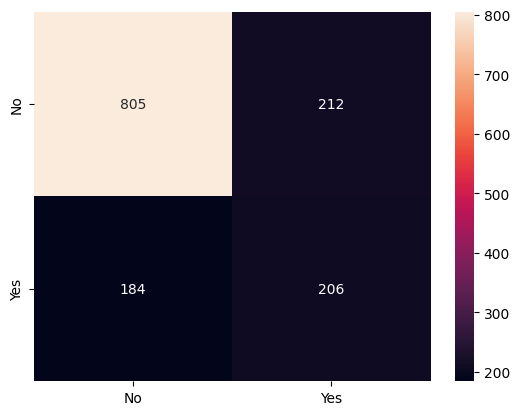

In [35]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [36]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.81      0.79      0.80      1017
         Yes       0.49      0.53      0.51       390

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.72      0.72      0.72      1407



##### B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b ( 5 marks )

In [37]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
model_dt=DecisionTreeClassifier()
final_dt_model = GridSearchCV(model_dt, param_grid, cv=5)
final_dt_model.fit(normalized_x_train, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [38]:
y_train_pred = final_dt_model.predict(normalized_x_train)
y_test_pred = final_dt_model.predict(normalized_x_test)

In [39]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  79.60888888888888
Accuracy of Test Data :  77.89623312011372


<AxesSubplot:>

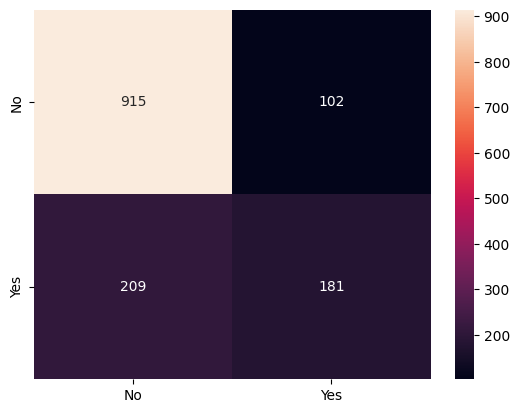

In [40]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [41]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.81      0.90      0.85      1017
         Yes       0.64      0.46      0.54       390

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



**Observation:**
1. In Base Decision Tree classifier model, we got train performance of 99.76% and test performance of 71.85% which shows the model is overfitted.
2. After Grid Search, Performance of train data dropped to 79.60% and test data performance improved by 7% and comes to 77.89% which shows perfectly fitted model

##### C. Train a model using Random forest and check the performance of the model on train and test data ( 4 marks )

In [42]:
clf = RandomForestClassifier(random_state=0).fit(normalized_x_train, y_train)

In [43]:
y_train_pred = clf.predict(normalized_x_train)
y_test_pred = clf.predict(normalized_x_test)

In [44]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  99.76888888888888
Accuracy of Test Data :  79.03340440653874


<AxesSubplot:>

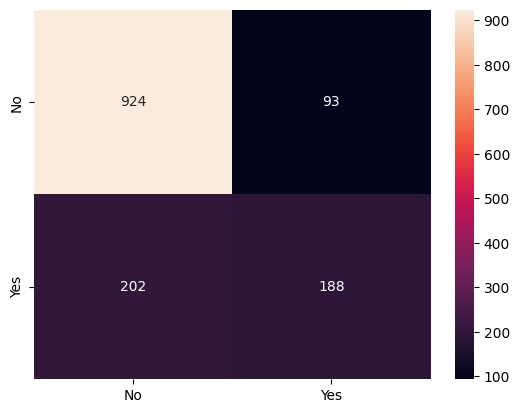

In [45]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [46]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1017
         Yes       0.67      0.48      0.56       390

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



##### D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d ( 5 marks )

In [47]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [48]:
rfc=RandomForestClassifier(random_state=7)

In [49]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(normalized_x_train, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [50]:
y_train_pred = CV_rfc.predict(normalized_x_train)
y_test_pred = CV_rfc.predict(normalized_x_test)

In [51]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  83.84
Accuracy of Test Data :  79.317697228145


<AxesSubplot:>

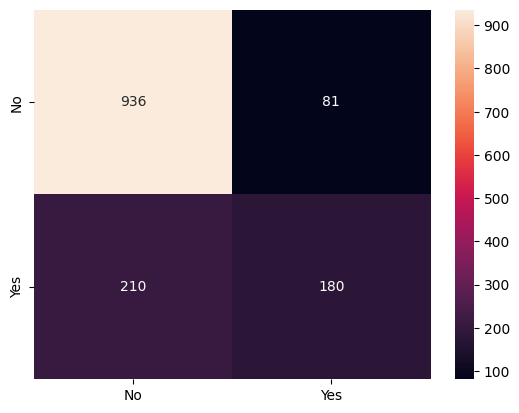

In [52]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [53]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1017
         Yes       0.69      0.46      0.55       390

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Observation:**
1. In Base Random Forest classifier model, we got train performance of 99.76% and test performance of 79.03% which shows the model is overfitted.
2. After applying Grid Search on the model, Train data performance dropped to 83.84% and test data performance improved to 79.31% which shows perfectly fitted model

##### E. Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )

In [54]:
adb = AdaBoostClassifier()
adb_model = adb.fit(normalized_x_train, y_train)

In [55]:
y_train_pred = adb_model.predict(normalized_x_train)
y_test_pred = adb_model.predict(normalized_x_test)

In [56]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  81.08444444444444
Accuracy of Test Data :  79.38877043354655


<AxesSubplot:>

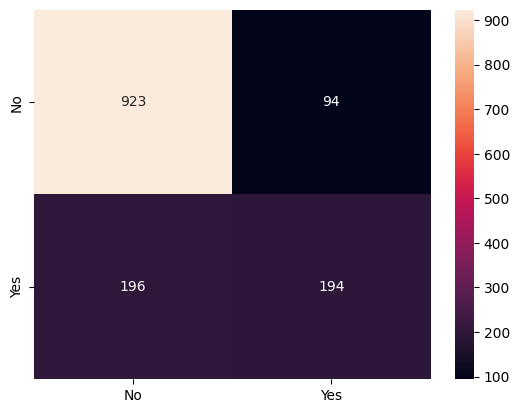

In [57]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [58]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1017
         Yes       0.67      0.50      0.57       390

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



##### F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f ( 5 marks )

In [59]:
model = AdaBoostClassifier()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

grid_result = grid_search.fit(normalized_x_train, y_train)

<IPython.core.display.Javascript object>

In [60]:
y_train_pred = grid_result.predict(normalized_x_train)
y_test_pred = grid_result.predict(normalized_x_test)

In [61]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  81.17333333333333
Accuracy of Test Data :  80.02842928216063


<AxesSubplot:>

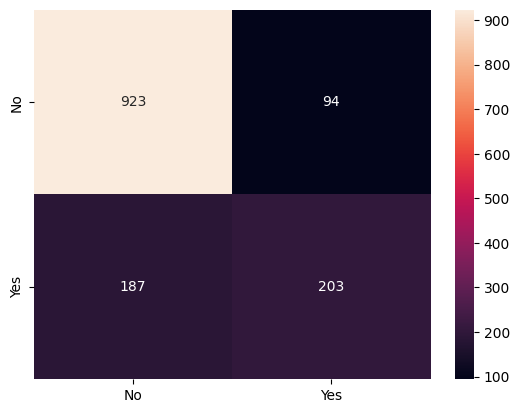

In [62]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [63]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1017
         Yes       0.68      0.52      0.59       390

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



**Observation:**
1. We have applied adaboost technique for training the classification model and got accuracy of 81% and 79% respectively for train and test data and f1 score of churn yes is very low which is 57%.
2. After Applying grid search, test performance improved by 1% and f1 score for churn "yes" class improved by 2%.


##### G. Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks )

In [64]:
clf = GradientBoostingClassifier(random_state=0).fit(normalized_x_train, y_train)

In [65]:
y_train_pred = clf.predict(normalized_x_train)
y_test_pred = clf.predict(normalized_x_test)

In [66]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  82.80888888888889
Accuracy of Test Data :  79.24662402274343


<AxesSubplot:>

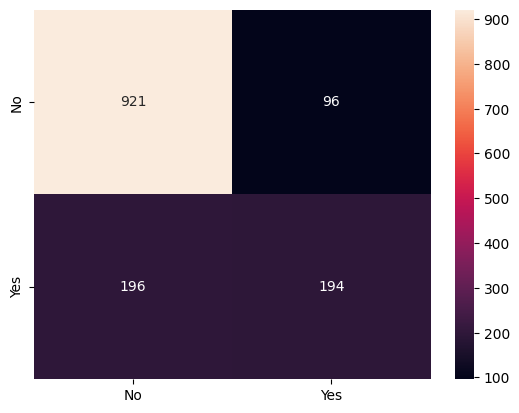

In [67]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [68]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1017
         Yes       0.67      0.50      0.57       390

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



##### H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h ( 5 marks )

In [69]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.9, 1.0],
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(normalized_x_train, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'subsample': [0.5, 0.618, 0.8, 0.9, 1.0]})

In [70]:
y_train_pred = clf.predict(normalized_x_train)
y_test_pred = clf.predict(normalized_x_test)

In [71]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Train Data : ",train_acc*100)
print("Accuracy of Test Data : ",test_acc*100)

Accuracy of Train Data :  81.76
Accuracy of Test Data :  80.59701492537313


<AxesSubplot:>

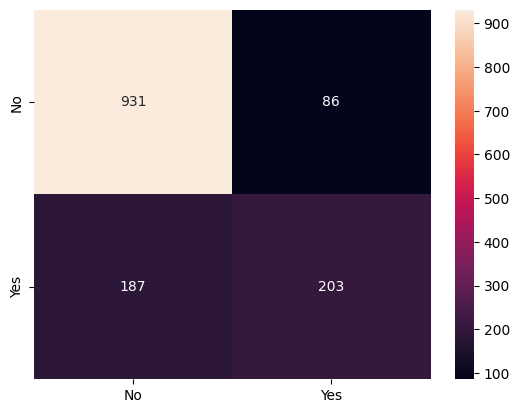

In [72]:
# Confusion matrix of Test Data
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])

df_confusion = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_confusion, annot=True,fmt='g')

In [73]:
print("classification  Matrix:\n",classification_report(y_test,y_test_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.83      0.92      0.87      1017
         Yes       0.70      0.52      0.60       390

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



**Observation:**
1. We have used Gradient bossting technique for this classification problem where with default features we got 82.80% and 79.24% train and test performance respectively.
2. After applying grid search train and test data accuracy slightly improved and f1 score of both the class is also improved by approx 1%.

##### I. Provide detailed analysis of the below steps (4 marks ) :

##### (1) Compare the performance of each model in train stage and test stage

If we check the F1 score of all the models after tuning or applying grid search.

#### Decision Tree Classifier

**Train Data:**
    **1. Accuracy :** 79.60
    
**Test Data:**
    **1. Accuracy :** 77.89
    **2. F1-Score :** Yes:      0.54
                  No:       0.85
                  Overall:  0.77
                  
                  

#### Random Forest model

**Train Data:**
    **1. Accuracy :** 83.84
    
**Test Data:**
    **1. Accuracy :** 79.31
    **2. F1-Score :** Yes:      0.55
                  No:       0.87
                  Overall:  0.78

#### AdaBoost technique

**Train Data:**
    **1. Accuracy :** 81.17
    
**Test Data:**
    **1. Accuracy :** 80.02
    **2. F1-Score :** Yes:      0.59
                  No:       0.87
                  Overall:  0.79

#### Gradient Boost technique

**Train Data:**
    **1. Accuracy :** 81.76

**Test Data:**
    **1. Accuracy :** 80.59
    **2. F1-Score :** Yes:     0.60
                  No:      0.87
                  Overall: 0.80

##### (2) Provide your observation on which model performed the best

1. Gradient Boost Model performed the best for this casestudy.
2. It's train performance is less than Random forest model but test performance is better than all other models.
3. Classwise F1 score is also best for Gradient Boost model. For class "No" it is performing almost similar to other classes but for class "Yes", it is performing the best.

##### (3) Provide your reasoning on why the model performed best

**Answer:-** Dataset of the model is not equally distributed accross the classes. One of the class has higher support than other class and Gradient boost classifier creates a model which combines the predictions of multiple weak learners so each weak model is learning from subset of the dataset and learning pattern of each class so Gradient boost classifier is performing the best.

##### (4) Provide your final conclusion on your observation

**Answer:-** Gradient boost classifier model is performing the best for this classfication model which is giving accuracy of 81.76% and 80.59% for train and test data respectively. It is not ideal for production. If we get more data and same support for each class then model will perform much better. Train and Test performance is similar so model is not overfitted.